In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data source: 
https://archive.ics.uci.edu/ml/datasets/Fertility

### Attribute Information:

- Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1)

- Age at the time of analysis. 18-36 (0, 1)

- Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1)

- Accident or serious trauma 1) yes, 2) no. (0, 1)

- Surgical intervention 1) yes, 2) no. (0, 1)

- High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1)

- Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)

- Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1)

- Number of hours spent sitting per day ene-16 (0, 1)

- Output: Diagnosis normal (N), altered (O)

In [89]:
headers = ['performed_seasons', 'age', 'childish_disease', 'trauma', 'surgical_intervention', 
           'fever_last_year', 'alcohol', 'smoking', 'hours_sitting', 'output']

In [90]:
df = pd.read_csv('fertility_Diagnosis.txt', header = None, names = headers)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   performed_seasons      100 non-null    float64
 1   age                    100 non-null    float64
 2   childish_disease       100 non-null    int64  
 3   trauma                 100 non-null    int64  
 4   surgical_intervention  100 non-null    int64  
 5   fever_last_year        100 non-null    int64  
 6   alcohol                100 non-null    float64
 7   smoking                100 non-null    int64  
 8   hours_sitting          100 non-null    float64
 9   output                 100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [91]:
df['output'].value_counts()

N    88
O    12
Name: output, dtype: int64

In [92]:
df.head()

,performed_seasons,age,childish_disease,trauma,surgical_intervention,fever_last_year,alcohol,smoking,hours_sitting,output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [93]:
# transform the data for interpretation
seasons = {-1: 'winter', -0.33: 'spring', 0.33: 'summer', 1: 'fall'}
df['performed_seasons'] = df['performed_seasons'].apply(lambda x: seasons[x])

fevers = {-1:'less than 3M ago', 0: 'more than 3M ago', 1:'No'}
df['fever_last_year'] = df['fever_last_year'].apply(lambda x: fevers[x])

alcohols = {0.2:'several times a day', 0.4:'every day', 0.6:'several time a week', 0.8:'once a week', 1:'hardly ever or never'}
df['alcohol'] = df['alcohol'].apply(lambda x: alcohols[x])

smokings = {-1:'never', 0:'occasional', 1:'every day'}
df['smoking'] = df['smoking'].apply(lambda x: smokings[x])

df['age'] = ((df['age'] * 18) + 18).astype(int)
df['hours_sitting'] = df['hours_sitting'] * 16
df['output'] = df['output'].apply(lambda x: 'Normal' if x == 'N' else 'Altered')
df.head()

,performed_seasons,age,childish_disease,trauma,surgical_intervention,fever_last_year,alcohol,smoking,hours_sitting,output
0,spring,30,0,1,1,more than 3M ago,once a week,occasional,14.08,Normal
1,spring,34,1,0,1,more than 3M ago,once a week,every day,4.96,Altered
2,spring,27,1,0,0,more than 3M ago,hardly ever or never,never,8.00,Normal
3,spring,31,0,1,1,more than 3M ago,hardly ever or never,never,6.08,Normal
4,spring,30,1,1,0,more than 3M ago,once a week,never,8.00,Altered


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   performed_seasons      100 non-null    object 
 1   age                    100 non-null    int64  
 2   childish_disease       100 non-null    int64  
 3   trauma                 100 non-null    int64  
 4   surgical_intervention  100 non-null    int64  
 5   fever_last_year        100 non-null    object 
 6   alcohol                100 non-null    object 
 7   smoking                100 non-null    object 
 8   hours_sitting          100 non-null    float64
 9   output                 100 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.9+ KB


A pretty small data set (100 data points). The label is 12% vs. 88% so I think it's fine to play around it and understand more.

### Exploratory Analysis

**Performed Seasons**

<AxesSubplot:xlabel='performed_seasons', ylabel='count'>

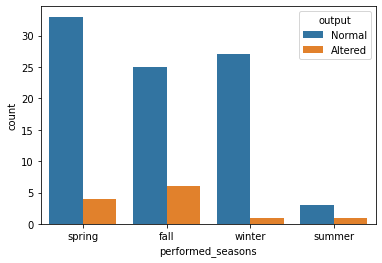

In [95]:
sns.countplot(data=df[['performed_seasons','output']],x='performed_seasons', hue='output')

Less analyses were performed in the summer. 

**Fevers in the last year**

<AxesSubplot:xlabel='fever_last_year', ylabel='count'>

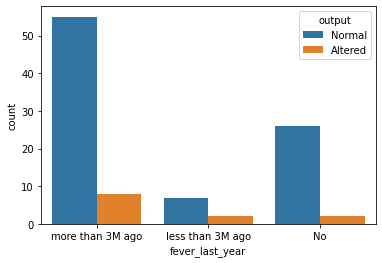

In [123]:
sns.countplot(data=df[['fever_last_year','output']],x='fever_last_year', hue='output')

In [124]:
altered_by_fever = df[['fever_last_year', 'output']].groupby('fever_last_year').apply(lambda x: x[x['output'] == 'Altered']['output'].count()) 
ana_by_fever = df.groupby('fever_last_year')['output'].count()
(altered_by_fever / ana_by_fever).round(2)

fever_last_year
No                  0.07
less than 3M ago    0.22
more than 3M ago    0.13
dtype: float64

There is no significant difference between the timing of high fevers in the last year.

**Alcohol Consumption**

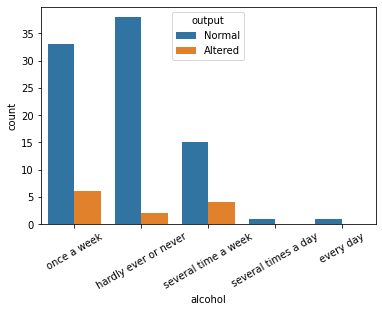

In [131]:
sns.countplot(data=df[['alcohol','output']],x='alcohol', hue='output')
plt.xticks(rotation=30);

In [132]:
altered_by_alcohol = df[['alcohol', 'output']].groupby('alcohol').apply(lambda x: x[x['output'] == 'Altered']['output'].count()) 
ana_by_alcohol = df.groupby('alcohol')['output'].count()
(altered_by_alcohol / ana_by_alcohol).round(2)

alcohol
every day               0.00
hardly ever or never    0.05
once a week             0.15
several time a week     0.21
several times a day     0.00
dtype: float64

In terms of alcohol consumption, the groups of 'every day' and 'several times a day' have no altered data points due to the group sizes. The group of 'several time a week' has relatively altered rate than the rest.

**Smoking Habits**

<AxesSubplot:xlabel='smoking', ylabel='count'>

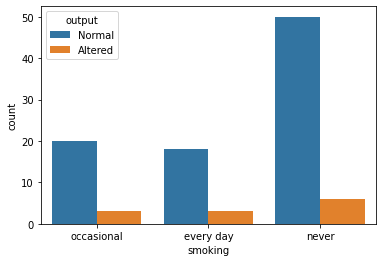

In [135]:
sns.countplot(data=df[['smoking','output']],x='smoking', hue='output')

The major group has no smoking behavior. As for the rest groups, there is no significant differences between them.

**Age**

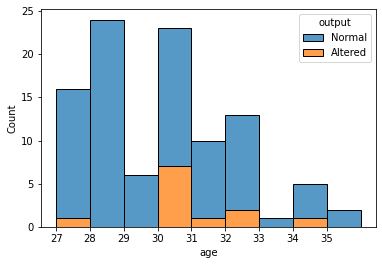

In [116]:
age_max = df['age'].max()
age_min = df['age'].min() 

sns.histplot(data=df[['age','output']],bins=age_max-age_min,
             x='age', hue='output',multiple='stack')
ticks = [age_min + i for i in range(age_max-age_min)]
plt.xticks(ticks);

In [122]:
altered_by_age = df[['age', 'output']].groupby('age').apply(lambda x: x[x['output'] == 'Altered']['output'].count()) 
ana_by_age = df.groupby('age')['output'].count()
(altered_by_age / ana_by_age).round(2)

age
27    0.06
28    0.00
29    0.00
30    0.30
31    0.10
32    0.15
33    0.00
34    0.20
36    0.00
dtype: float64

The smallest age 27 had the most analyses. As age increases, number of analyses reduces. Altered rate does not follow this trend.

**Hours spent sitting per day**

<AxesSubplot:xlabel='hours_sitting', ylabel='Count'>

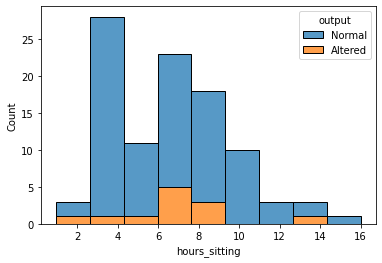

In [144]:
hours_max = df['hours_sitting'].max()
hours_min = df['hours_sitting'].min() 

sns.histplot(data=df[['hours_sitting','output']],x='hours_sitting', hue='output',multiple='stack')

The majority spends less than 11 hours on sitting per day, within which altered appears in every sub-group.

**Surgical intervention**

<AxesSubplot:xlabel='surgical_intervention', ylabel='count'>

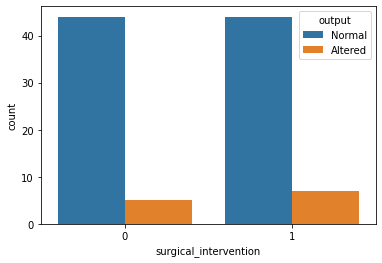

In [161]:
sns.countplot(data=df[['surgical_intervention','output']], x='surgical_intervention', hue='output')

In [162]:
df['surgical_intervention'].value_counts()

1    51
0    49
Name: surgical_intervention, dtype: int64

There seems no significant differences whether there is surgical intervention or not.

**Childish diseases**

<AxesSubplot:xlabel='childish_disease', ylabel='count'>

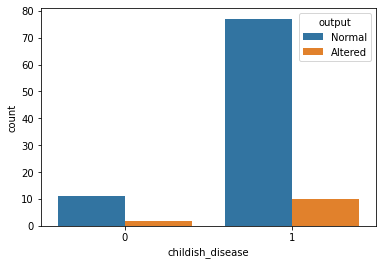

In [163]:
sns.countplot(data=df[['childish_disease','output']], x='childish_disease', hue='output')

In [164]:
altered_by_disease = df[['childish_disease', 'output']].groupby('childish_disease').apply(lambda x: x[x['output'] == 'Altered']['output'].count()) 
ana_by_disease = df.groupby('childish_disease')['output'].count()
(altered_by_disease / ana_by_disease).round(2)

childish_disease
0    0.15
1    0.11
dtype: float64

There seems no significant differences whether childish diseases developed or not.

**Accident or serious trauma**

<AxesSubplot:xlabel='trauma', ylabel='count'>

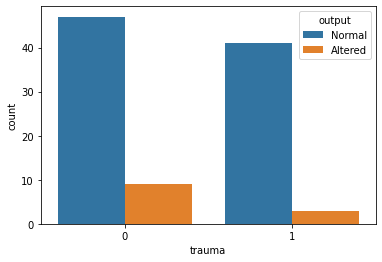

In [165]:
sns.countplot(data=df[['trauma','output']], x='trauma', hue='output')

There seems no significant differences whether accident or serious trauma occurred or not.

In [179]:
altered_group = df[df['output']=='Altered']
normal_group = df[df['output']!='Altered']

In [184]:
print('Altered Group Stats\n',altered_group.describe()[1:])
print('\n')
print('Normal Group Stats\n',normal_group.describe()[1:])

Altered Group Stats
             age  childish_disease    trauma  surgical_intervention  \
mean  30.500000          0.833333  0.250000               0.583333   
std    1.678744          0.389249  0.452267               0.514929   
min   27.000000          0.000000  0.000000               0.000000   
25%   30.000000          1.000000  0.000000               0.000000   
50%   30.000000          1.000000  0.000000               1.000000   
75%   31.250000          1.000000  0.250000               1.000000   
max   34.000000          1.000000  1.000000               1.000000   

      hours_sitting  
mean       6.693333  
std        3.077535  
min        0.960000  
25%        5.800000  
50%        6.560000  
75%        8.000000  
max       14.080000  


Normal Group Stats
             age  childish_disease    trauma  surgical_intervention  \
mean  29.579545          0.875000  0.465909               0.500000   
std    2.195720          0.332614  0.501695               0.502865   
min   27.0

Observations:
- Age: Altered is averagely older
- Accident or trauma: more likely to happen in Altered
- Surgical Intervention: more likely to happen in Normal
- Hours spent sitting: Altered is averagely longer